In [1]:
# Installing required packages
!pip install pyspark
!pip install findspark
!pip install pyarrow==1.0.0
!pip install pandas
!pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=0ad9dabf674509e2446ef83c78f95ba2605797da91bda66c8438333ff1c0ded2
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subproc

In [6]:
import findspark
findspark.init()

In [7]:
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
# Creating a spark context class
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [10]:
spark

In [11]:
df1 = pd.read_csv('/content/music_streaming.csv')
df1.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10



**a) Perform any necessary data cleaning & engineering that renders your data useable (i.e. handling missing values, duplicates, classification, transformation...etc.)**


First, we need to check on the columns that contain null values. To do that, we will use pandas library for data cleaning because it contains lot of functions and its an easier/ faster way to clean the data. Then , we can save the cleaned data into spark to apply the provided tasks . 

In [12]:
df1.isnull().sum()

Artist Name              0
Track Name               0
Popularity             394
danceability             0
energy                   0
key                   1743
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3587
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Genre                    0
dtype: int64

As we can see here that the columns that have null values are : **popularity** , **key**, and **instrumentalness**

Therefore, we'll remove the null values in these attributes by applying the function ( dropna() ) that drops the 'NA' values and setting the axis to be = 0 because we want to drop the null values in each row . We have a function called ( fillna() ) that fills the null values in our dataset however, we'll not use it because our attributes are actually such a unique or we can say that we cannot replace a key of a song by any random number because it'll not be reasonable . Same goes for the attributes ( popularity and instrumentalness) . We'll remove the entire row from our dataset as it'll be useless info to have it in our dataset . 

**FYI**

axis = 1 --> columns 

axis = 0 --> rows

To do that, we'll initialize a value that called **'columns_with_na'** that holds all the attributes ( **popularity** , **key**, and **instrumentalness** ) and using this initialized value, we'll apply what we mentioned earlier . 

In [13]:
columns_with_na = ['Popularity' , 'key', 'instrumentalness']

In [14]:
cleaned_df1 = df1.dropna(axis=0, how = 'any', subset = columns_with_na, inplace = False)
cleaned_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10338 entries, 1 to 15515
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         10338 non-null  object 
 1   Track Name          10338 non-null  object 
 2   Popularity          10338 non-null  float64
 3   danceability        10338 non-null  float64
 4   energy              10338 non-null  float64
 5   key                 10338 non-null  float64
 6   loudness            10338 non-null  float64
 7   mode                10338 non-null  int64  
 8   speechiness         10338 non-null  float64
 9   acousticness        10338 non-null  float64
 10  instrumentalness    10338 non-null  float64
 11  liveness            10338 non-null  float64
 12  valence             10338 non-null  float64
 13  tempo               10338 non-null  float64
 14  duration_in min/ms  10338 non-null  float64
 15  time_signature      10338 non-null  int64  
 16  Genr

In [15]:
cleaned_df1.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Genre                 0
dtype: int64

In [16]:
cleaned_df1.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


as we can see from the above results. We dropped the NA values sucessfully from the dataset.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

***Checking for duplicates***

In [17]:
cleaned_df1.duplicated().sum()

0

As we can see that there's no duplicates in our dataset

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Track name and Artist name :** 
We'll change the name of the attribute " Track name " to Track_name and the attribute "artist name" to "Artist_name" by adding underscore between the two words


 **for example :** 

**instead of :** Artist Name 

**Going to be :** Artist_Name

( the reason of doing this is to avoid the problems that could happen (fel spaces) when starting to work in spark DataFrame and SQL



In [18]:
cleaned_df1.rename(columns={'Artist Name': "Artist_Name"}, inplace=True)
cleaned_df1.rename(columns={'Track Name': "Track_Name"}, inplace=True)
cleaned_df1.head()

<ipython-input-18-4433c24f8f9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1.rename(columns={'Artist Name': "Artist_Name"}, inplace=True)
<ipython-input-18-4433c24f8f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1.rename(columns={'Track Name': "Track_Name"}, inplace=True)


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Danceability attribute :** As explained in the description

it is a measure that describes how suitable the track is for dancing based on the combination of musical elements mentioned earlier, such as tempo, rhythm stability, beat strength, and overall regularity.

Based on our researches, on spotify, it ranges from 0 to 1, and based on the below cell of code, the danceability values range from 0.0644 to 0.989 (approximately 1) , with 0 indicating a song that is least suitable for dancing and 1 representing a highly danceable song. Meaning that, the closer the value is to 1, the more suitable the song is for dancing based on the combination of musical elements mentioned earlier . (elly homa tempo, rhythm , etc ..)

In [19]:
min_value = min(cleaned_df1['danceability'])
max_value = max(cleaned_df1['danceability'])

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 0.0644
Maximum value: 0.989


To understand more, we can take a look on the first song that called : 

**"Hitch a Ride",**  by Boston has a danceability value of 0.382, indicating it is moderately danceable. ( nos nos)

So far, we'll not do anything regarding this attribute based on our outcomes. You can take these details as FYI

**------------------------------------------------------------------------------------------------------------------------------------------------------------------** 

**Energy attribute:** As explained in the description, 
it describes how energetic and dynamic a song feels to the listener. Based on our researches, on spotify, it ranges from 0 to 1,and based on the below cell of code,  it shows the range from 0.00124 ( approximately 0) to 1 .


In [20]:
min_value = min(cleaned_df1['energy'])
max_value = max(cleaned_df1['energy'])

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 0.00124
Maximum value: 1.0


These values quantify the level of energy for each respective song, with 0 indicating low energy and 1 representing high energy. 
For example, if we took a look on the fiest song: 

 **"Hitch a Ride"**  by Boston has an energy value of 0.814, indicating it is highly energetic.

 So far, we'll not do anything regarding this attribute based on our outcomes. You can take these details as FYI
 
 **------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Popularity attribute:** as we understood from the dataset, it refers to the measure of how popular a song is on Spotify. It represents the relative popularity of a song based on its streaming and listener engagement on the platform. 

 Based on our researches, on spotify, it ranges from 1 to 100, and based on the below cell of code, it shows the range from 1 to 98 
 
 (approximately 100)

In [21]:
min_value = min(cleaned_df1['Popularity'])
max_value = max(cleaned_df1['Popularity'])

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 1.0
Maximum value: 98.0


**For example:** if we picked the second song : **"No Side to Fall In"** by The Raincoats has a popularity value of 35.0, suggesting a lower level of popularity.

So far, we'll not do anything regarding this attribute based on our outcomes. You can take these details as FYI
 
 **------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Key attribute:** As explained in the description, it is the estimated overall key of a particular track. the key itself means the lines if the musical note as shown in the below images:  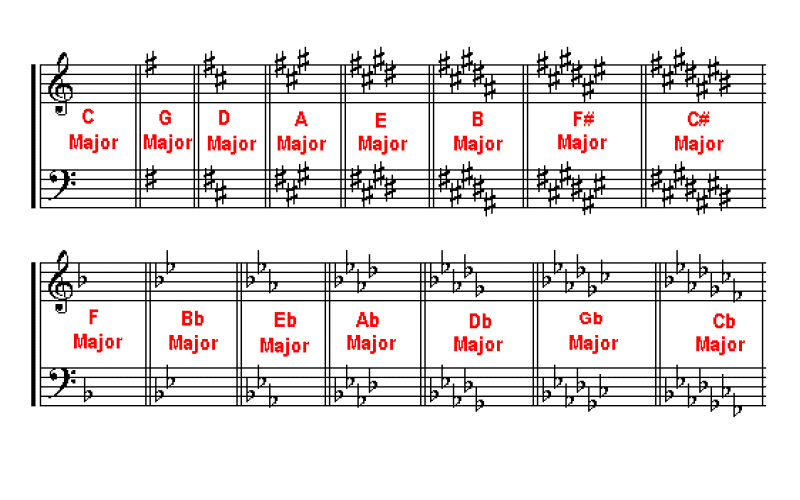


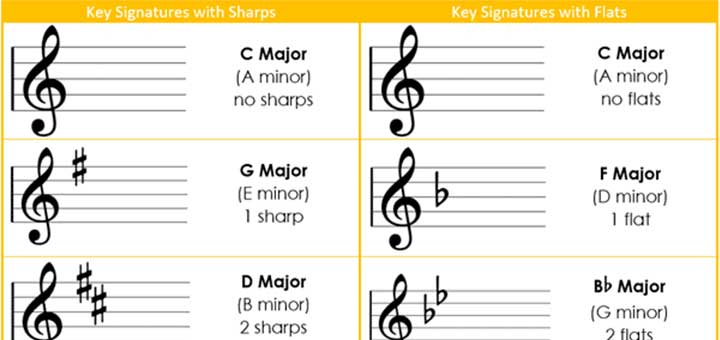

**To understand it more,** let's take an example: 

the Piano keys ( black and white things) are known as keys, and every key is referred to a name in music ( based on our researches):

0 represents the pitch C

1 represents the pitch C# or Db (C sharp or D flat)

2 represents the pitch D

3 represents the pitch D# or Eb (D sharp or E flat)

4 represents the pitch E

5 represents the pitch F

6 represents the pitch F# or Gb (F sharp or G flat)

7 represents the pitch G

8 represents the pitch G# or Ab (G sharp or A flat)

9 represents the pitch A

10 represents the pitch A# or Bb (A sharp or B flat)

11 represents the pitch B

**And here an example as shown in the following image:** 
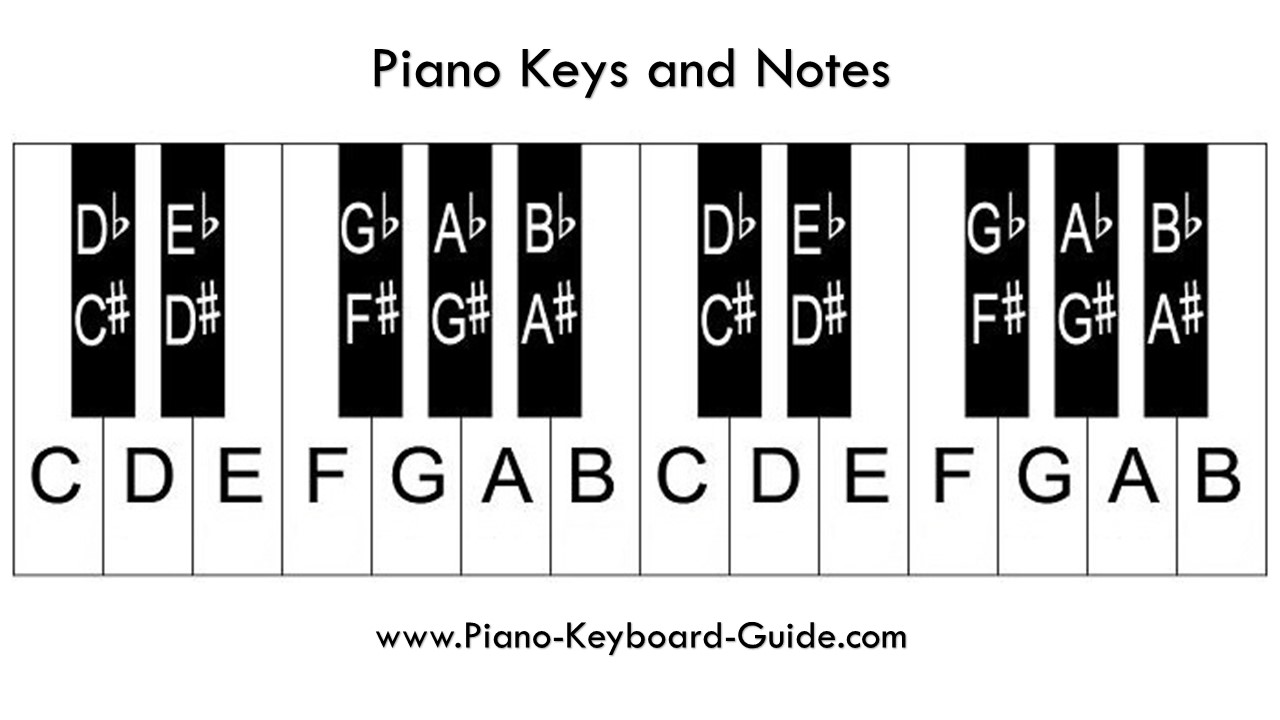

in our dataset, we can determine the estimated overall key of a song.
 For example, if a song has a "Key" value of 2, it indicates that the track is estimated to be in the key of D.

 We'll replace each number to its corresponding key value in order to be more clear and reasonable : 

In [22]:
# first, we need to check the unique values in the key attribute
cleaned_df1['key'].unique()

array([ 3.,  6.,  2.,  5., 10.,  7., 11.,  1.,  9.,  4.,  8.])

In [23]:
 # since the values of the key started from 1, we'll replace each number starting from 1 to its corresponding 
 # key value : 
cleaned_df1['key'] = cleaned_df1['key'].replace(1,'pitch C# or Db')
cleaned_df1['key'] = cleaned_df1['key'].replace(2,'pitch D')
cleaned_df1['key'] = cleaned_df1['key'].replace(3,'pitch D# or Eb')
cleaned_df1['key'] = cleaned_df1['key'].replace(4,'pitch E')
cleaned_df1['key'] = cleaned_df1['key'].replace(5,'pitch F')
cleaned_df1['key'] = cleaned_df1['key'].replace(6,'F# or Gb')
cleaned_df1['key'] = cleaned_df1['key'].replace(7,'pitch G')
cleaned_df1['key'] = cleaned_df1['key'].replace(8,'pitch G# or Ab')
cleaned_df1['key'] = cleaned_df1['key'].replace(9,' pitch A')
cleaned_df1['key'] = cleaned_df1['key'].replace(10,'pitch A# or Bb')
cleaned_df1['key'] = cleaned_df1['key'].replace(11,'pitch B')

<ipython-input-23-ad93d7b8ae56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1['key'] = cleaned_df1['key'].replace(1,'pitch C# or Db')
<ipython-input-23-ad93d7b8ae56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1['key'] = cleaned_df1['key'].replace(2,'pitch D')
<ipython-input-23-ad93d7b8ae56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [24]:
cleaned_df1.head()
# beautiful result :)

,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,pitch D# or Eb,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,F# or Gb,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,pitch D,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,F# or Gb,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,pitch F,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Loudness attribute:** As explained in the description , 
represents the overall loudness of a song. 

**Based on our researches ,**

a higher positive value indicates a louder song, while a lower negative value indicates a quieter song. The loudness values can range from negative infinity to 0 dB, with 0 dB representing the maximum loudness.

**For example:** 
the first song " Hitch a Ride " by Boston has a loudness value of -7.230, indicating that the song is relatively quieter.

However, loudness is measured in decibels (dB), so we can simply add (dB) next to the name of the attribute by renaming it .There's another option that we can add the measurement of the loudness next to each value but this is gonna be a waste of time :) fa to be smart we'll do the first suggestion . 

( just to be more clear )

In [25]:
cleaned_df1.rename(columns={'loudness': "loudness_in_(dB)"}, inplace=True)
cleaned_df1.head()

<ipython-input-25-fa8ae5f1400e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1.rename(columns={'loudness': "loudness_in_(dB)"}, inplace=True)


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness_in_(dB),mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,pitch D# or Eb,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,F# or Gb,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,pitch D,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,F# or Gb,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,pitch F,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Mode attribute:** As explained in the description, it indicates the modality (major or minor) of a song. 

**Based on our researches,** 

in music theory, major and minor are two of the most common modes or tonalities. The major mode generally conveys a more positive, uplifting, or happier mood, while the minor mode tends to evoke a sadder, darker, or more melancholic sound.

**based on our dataset,** we have the 2 binary values ( 0/1) and based on the description that 1 refers to the Major mode while 0 refers to the Minor mode, we'll convert these two numbers to their corresponding values ( major and minor) .


**For example:** 

**Major = 1**

**Minor = 0**

To learn more about it , please check the provided link 😊 ! : https://www.youtube.com/watch?v=jFguFm7hdho

To do that, we'll also use the replace function 

In [26]:
cleaned_df1['mode'] = cleaned_df1['mode'].replace(0,'Minor')
cleaned_df1['mode'] = cleaned_df1['mode'].replace(1,'Major')
cleaned_df1.head()

<ipython-input-26-edb3551fd7a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1['mode'] = cleaned_df1['mode'].replace(0,'Minor')
<ipython-input-26-edb3551fd7a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1['mode'] = cleaned_df1['mode'].replace(1,'Major')


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness_in_(dB),mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,pitch D# or Eb,-7.230,Major,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,F# or Gb,-8.334,Major,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,pitch D,-4.279,Major,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,F# or Gb,0.878,Major,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,pitch F,-9.647,Minor,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2


**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Speechiness attribute:** as explained in the description and from our understanding, 

 it represents the presence of spoken words in a song and measures how much of the audio content can be identified as speech or spoken words rather than music.

 if we took a look on the range of the values of this attribute as shown in the below cell of code: 
 

In [27]:
min_value = min(cleaned_df1['speechiness'])
max_value = max(cleaned_df1['speechiness'])

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 0.0225
Maximum value: 0.935


**Based on our researches,** on spotify, it ranges from 0 to 1. **And as we can see from the above result**, the attribute value ranges from 0.0225 to 1 (approximately), with higher values indicating a greater presence of spoken words.

**To understand the concept more, lets take an example:** 

the first song by Boston "Hitch a Ride" : has a speechiness value of 0.0406, indicating that the track has a low presence of spoken words.

So far, we'll not do anything regarding this attribute based on our outcomes. You can take these details as FYI

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Acousticness attribute:** As explained in the description,it represents a confidence measure of whether a song is acoustic or not. 

**based on our researches,** on spotify, it is expressed as a value ranging from 0 to 1. A higher value indicates a higher confidence that the track is acoustic, while a lower value suggests a lower confidence or a greater presence of electronic or synthesized sounds . 

**For example:** 
The first song by Boston - Hitch a ride

The acousticness value is 0.001100, which is very low. This suggests that the track is not acoustic and likely contains a significant amount of electronic or synthesized elements.

 (meaning that , en el soot mal3oob feh hateen hagat w keda)

 The below cell of code shows the range of this attribute: 

In [28]:
min_value = min(cleaned_df1['acousticness'])
max_value = max(cleaned_df1['acousticness'])

print("Minimum value:", min_value)
print("Maximum value:", max_value)
# as we can see that the range is from 0 to 0.996

Minimum value: 0.0
Maximum value: 0.996


So far, we'll not do anything regarding this attribute based on our outcomes. You can take these details as *FYI*

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Instrumentalness attribute:** As explained in the description, it is a measure that predicts whether a song contains vocals or not .

**Based on our researches,** it is expressed as a value ranging from 0 to 1. A higher value indicates a higher likelihood that the track is instrumental and does not contain vocals, while a lower value suggests a higher likelihood of vocals or vocal elements in the track.

**For example:** if we picked the song "Hitch a ride: by Boston, we can see that the instrumentalness value is 0.001100, which is very low. This suggests that the song likely contains vocals or vocal elements.

In [29]:
min_value = min(cleaned_df1['instrumentalness'])
max_value = max(cleaned_df1['instrumentalness'])

print("Minimum value:", min_value)
print("Maximum value:", max_value)
# as we can see that the range is from 6* 10*-6 (1M) to 0.996

Minimum value: 1e-06
Maximum value: 0.996


So far, we'll not do anything regarding this attribute based on our outcomes. You can take these details as *FYI*

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Liveness attribute:** As explained in the description and based on our researches, it is the likelihood of a song being performed live. It detects the presence of an audience in the recording and provides a measure of the songs's live performance characteristics. Higher values of liveness indicate a higher probability that the song was recorded during a live performance. 


The values of the "Liveness" attribute range from 0.0 to 1.0. A liveness value close to 0.0 suggests that the song is more likely to be a studio recording or a non-live performance, while a value close to 1.0 indicates a higher probability of the song being recorded during a live performance.


For example, song Hitch the ride by Boston has a liveness value of 0.1010, suggesting a relatively low likelihood of it being a live performance.

The below cell of code shows the range of this attribute: 

In [30]:
min_value = min(cleaned_df1['liveness'])
max_value = max(cleaned_df1['liveness'])

print("Minimum value:", min_value)
print("Maximum value:", max_value)
# as we can see that the range is from 0.0119 to 0.992

Minimum value: 0.0119
Maximum value: 0.992


So far, we'll not do anything regarding this attribute based on our outcomes. You can take these details as *FYI*

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Valence attribute:** 
Based on our researches and as explained in the description, 

it represents the musical positiveness conveyed by a song. It describes the emotional and mood-related aspects of the music. A higher valence value indicates a more positive and uplifting sound, while a lower valence value suggests a more negative or melancholic tone.

The values of the "Valence" attribute range from 0 to 1. A valence value close to 0 suggests a track with a more negative or sad emotional tone, while a value close to 1 indicates a track with a more positive or happy emotional tone. 

The below cell of code shows the range of this attribute: 

In [31]:
min_value = min(cleaned_df1['valence'])
max_value = max(cleaned_df1['valence'])

print("Minimum value:", min_value)
print("Maximum value:", max_value)
# as we can see that the range is from 0.0215 to 0.98

Minimum value: 0.0215
Maximum value: 0.98


So far, we'll not do anything regarding this attribute based on our outcomes. You can take these details as *FYI*

**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Tempo attribute:** As explained in the description and based on our researche outcomes , 

its just the speed of the song meaning that ,

it represents the overall estimated tempo of a song in beats per minute (BPM). Tempo refers to the speed or pace of a musical piece, indicating how fast or slow the beats are in the music.

In general, 

The values of the "Tempo" attribute are numeric and typically range from around 50 BPM (very slow) to 200 BPM (very fast). However, there can be songs with tempos outside this range as well.

For example: 
the song "Hitch a Ride" by Boston has a tempo value of 116.454 BPM, indicating a moderate tempo.
 
We'll just rename this column by adding the measurement (BPM) next to the "tempo" word .

(to be more clear)

In [32]:
cleaned_df1.rename(columns={'tempo': "tempo_(BPM)"}, inplace=True)
cleaned_df1.head()

<ipython-input-32-a14dc5c61140>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1.rename(columns={'tempo': "tempo_(BPM)"}, inplace=True)


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness_in_(dB),mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo_(BPM),duration_in min/ms,time_signature,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,pitch D# or Eb,-7.230,Major,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,F# or Gb,-8.334,Major,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,pitch D,-4.279,Major,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,F# or Gb,0.878,Major,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,pitch F,-9.647,Minor,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2



**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Duration in min/ms attribute:** as explained in the description , it is the duration of the track in milliseconds.

in this attribute, it contains two types of numbers, a whole number represents the time in ms while foaling numbers represent the time in min . We need to convert all the floating numbers to whole numbers to apply question 2 that says " remove any songs that exceed 5 minutes" .

To do that, we'll specify the floating numbers and divide the time value by 60000 

As we took in our labs, we will use the lambda function as it could be applied in the datasets while using complex functions (agg)

In [33]:
cleaned_df1['duration_in min/ms'].head(20)

1     251733.000000
2     109667.000000
4     229960.000000
5     208133.000000
6     329387.000000
7          3.105783
8     237867.000000
9          4.330450
11         4.440250
12    153693.000000
13    146800.000000
14    154293.000000
16    283013.000000
17    137872.000000
18    138000.000000
19    309867.000000
22    257360.000000
23    204280.000000
24    197160.000000
25    180822.000000
Name: duration_in min/ms, dtype: float64

In [34]:
# Convert the values in the "duration_in min/ms" column from ms to min
cleaned_df1['duration_in min/ms'] = cleaned_df1['duration_in min/ms'].apply(lambda x: x / 60000 if x.is_integer() else x)


<ipython-input-34-81c8b4e2db91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1['duration_in min/ms'] = cleaned_df1['duration_in min/ms'].apply(lambda x: x / 60000 if x.is_integer() else x)


In [35]:
cleaned_df1['duration_in min/ms'].head(20)

1     4.195550
2     1.827783
4     3.832667
5     3.468883
6     5.489783
7     3.105783
8     3.964450
9     4.330450
11    4.440250
12    2.561550
13    2.446667
14    2.571550
16    4.716883
17    2.297867
18    2.300000
19    5.164450
22    4.289333
23    3.404667
24    3.286000
25    3.013700
Name: duration_in min/ms, dtype: float64

To make our dataset more elegant and reasonable , we'll rename the column **'duration_in min/ms'** to **'Duration_inMins'** without the ms part 

In [36]:
cleaned_df1.rename(columns={'duration_in min/ms': "Duration_inMins"}, inplace=True)
cleaned_df1.head()
# scroll left to see the result :)

<ipython-input-36-8fbbd2cf5e40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1.rename(columns={'duration_in min/ms': "Duration_inMins"}, inplace=True)


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness_in_(dB),mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo_(BPM),Duration_inMins,time_signature,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,pitch D# or Eb,-7.230,Major,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,F# or Gb,-8.334,Major,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,pitch D,-4.279,Major,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,F# or Gb,0.878,Major,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,3.468883,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,pitch F,-9.647,Minor,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,5.489783,4,2



**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Genre attribute:** based on our research outcomes and as explained in the description, it represents the category of a particular song. Genre is a way to classify and categorize music based on shared characteristics, styles, and conventions. It helps to distinguish songs based on their musical elements, cultural influences, and target audience.


 we'll change the values of the Genre column from numeric into Strings as descriped in the assignment .

**For example:** "Hitch a Ride" by Boston is categorized under the genre 10 which is Equivalent to --> "Country."

To do that, we need to know the unique values in that column and then use them to refer each number to its corresponding Common Genre : 

**For example :** 
Genre = 0 --> Rock 
Genre = 1 --> Indie 
and so on for the rest of the values . 


In [37]:
cleaned_df1['Genre'].unique()

array([10,  6,  2,  4,  8,  3,  7,  1,  5,  9,  0])

In [38]:
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(0,'Rock')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(1,'Indie')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(2,'Alt')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(3,'Pop')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(4,'Metal')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(5,'HipHop')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(6,'Alt_Music')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(7,'Blues')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(8,'Acoustic/Folk')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(9,'Instrumental')
cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(10,'Country')
cleaned_df1.head()

<ipython-input-38-207cab474e7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(0,'Rock')
<ipython-input-38-207cab474e7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1['Genre'] = cleaned_df1['Genre'].replace(1,'Indie')
<ipython-input-38-207cab474e7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness_in_(dB),mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo_(BPM),Duration_inMins,time_signature,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,pitch D# or Eb,-7.230,Major,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550,4,Country
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,F# or Gb,-8.334,Major,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783,4,Alt_Music
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,pitch D,-4.279,Major,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667,4,Country
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,F# or Gb,0.878,Major,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,3.468883,4,Alt_Music
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,pitch F,-9.647,Minor,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,5.489783,4,Alt


**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Time signature attribute:** Based on our researches, 
this column establishes the "character" of your rhythmic pattern.

Think of time signature  as "the # of beats in the pattern before it repeats" . It's one of the three pieces that combines to create your unique rhythm 

We'll drop ( time signature ) column as its an useless column and because their values are actually kind of equivalent to the Genre column, meaning that, if we have a Genre of a song, we can determine the time signature of it based of the gategory of the song . 

 To learn more about it , check the provided link: https://www.learneverythingabout.com/lyrics-songs/songwriting/time-signature-music.html 

The below cell of code shows the following: 👇🏻

In [39]:
cleaned_df1.drop(columns = ['time_signature'], axis=1, inplace=True)
cleaned_df1.head()

<ipython-input-39-b66424502126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df1.drop(columns = ['time_signature'], axis=1, inplace=True)


,Artist_Name,Track_Name,Popularity,danceability,energy,key,loudness_in_(dB),mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo_(BPM),Duration_inMins,Genre
1,Boston,Hitch a Ride,54.0,0.382,0.814,pitch D# or Eb,-7.230,Major,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.195550,Country
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,F# or Gb,-8.334,Major,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,1.827783,Alt_Music
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,pitch D,-4.279,Major,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,3.832667,Country
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,F# or Gb,0.878,Major,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,3.468883,Alt_Music
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,pitch F,-9.647,Minor,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,5.489783,Alt


**------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Now, after we explored and cleaned our dataset w ba2et ready for applying the tasks on it , we'll export it fi our pc in order to import it directly to apply on it the spark SQL part ( that will be in the other notebook (SparkSQL Spotify)

In [40]:
# saving the data after cleaning it 
cleaned_df1.to_csv('cleaned_music.csv', index=False)

In [ ]:
# downloading the data to our pc
from google.colab import files

files.download('cleaned_music.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After we explored and cleaned our dataset using pandas, we'll create a new dataframe using spark that contains the cleaned_df1

We'll create a spark dataframe using the prepared data that we did 

In [41]:
spark_df1 = spark.createDataFrame(cleaned_df1)

In [42]:
spark_df1.printSchema()

root
 |-- Artist_Name: string (nullable = true)
 |-- Track_Name: string (nullable = true)
 |-- Popularity: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness_in_(dB): double (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo_(BPM): double (nullable = true)
 |-- Duration_inMins: double (nullable = true)
 |-- Genre: string (nullable = true)



In [43]:
spark_df1.show()

+--------------------+--------------------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+------------------+-------------+
|         Artist_Name|          Track_Name|Popularity|danceability|energy|           key|loudness_in_(dB)| mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo_(BPM)|   Duration_inMins|        Genre|
+--------------------+--------------------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+------------------+-------------+
|              Boston|        Hitch a Ride|      54.0|       0.382| 0.814|pitch D# or Eb|           -7.23|Major|     0.0406|      0.0011|         0.00401|   0.101|  0.569|    116.454|           4.19555|      Country|
|       The Raincoats|  No Side to Fall In|      35.0|       0.434| 0.614|      F# or Gb|          -8.334|Major|     0.0525|       0

**b) Remove any songs that exceed 5 minutes**

In this part, we can consider it as its a data cleaning part and it could be done using pandas by applying the following code :

 cleaned_df1 = cleaned_df1[cleaned_df1['duration_in min/ms'] <= 5]

and then after doing that, we can save our dataframe as a new csv file and apply the rest of the tasks. 

However, we'll use spark as the idea of the assignment is to use spark in order to apply the methods within spark on the required tasks , to do so we'll apply following: 

In [44]:
spark_df1 = spark_df1.filter((spark_df1.Duration_inMins <= 5))

In [45]:
spark_df1.show()

+--------------------+--------------------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+------------------+-------------+
|         Artist_Name|          Track_Name|Popularity|danceability|energy|           key|loudness_in_(dB)| mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo_(BPM)|   Duration_inMins|        Genre|
+--------------------+--------------------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+------------------+-------------+
|              Boston|        Hitch a Ride|      54.0|       0.382| 0.814|pitch D# or Eb|           -7.23|Major|     0.0406|      0.0011|         0.00401|   0.101|  0.569|    116.454|           4.19555|      Country|
|       The Raincoats|  No Side to Fall In|      35.0|       0.434| 0.614|      F# or Gb|          -8.334|Major|     0.0525|       0

👆🏻 **Part B** shows that when we used the funtion filter which we use it when we want e.g (Removing, displaying, etc .. ). fa As shown above, the whole row were removed from the dataset and then we saved the dataset by initializing it to itself so we don't lose any changes that we made .

**c) Display songs by J. Cole, Novo Amor and Anson Seabra**





**To do that,** we have 2 options to display the result, either by diplaying it cell by cell, meaning that, kol artist name in a single cell, or displaying themm all together using OR function to display all the possible songs.  

We'll also use the filter function to display songs by initializing the artist name to the required one 

*Option 1 👇🏻*

In [46]:
spark_df1.filter(spark_df1['Artist_Name'] == 'J. Cole').show()

+-----------+----------+----------+------------+------+---+----------------+----+-----------+------------+----------------+--------+-------+-----------+---------------+-----+
|Artist_Name|Track_Name|Popularity|danceability|energy|key|loudness_in_(dB)|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo_(BPM)|Duration_inMins|Genre|
+-----------+----------+----------+------------+------+---+----------------+----+-----------+------------+----------------+--------+-------+-----------+---------------+-----+
+-----------+----------+----------+------------+------+---+----------------+----+-----------+------------+----------------+--------+-------+-----------+---------------+-----+



👆🏻👆🏻👆🏻 We can notice that there's no data regarding the artist "J. Cole" because his song has exceeded the 5 min ( it was 196946 ms = 32.8243333 min ) fa that's why we cannot see any informations regarding this artist as he was being removed from our dataset  

In [47]:
spark_df1.filter(spark_df1['Artist_Name'] == 'Novo Amor').show()

+-----------+----------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+---------------+---------+
|Artist_Name|Track_Name|Popularity|danceability|energy|           key|loudness_in_(dB)| mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo_(BPM)|Duration_inMins|    Genre|
+-----------+----------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+---------------+---------+
|  Novo Amor|  Birdcage|      54.0|       0.574| 0.407|pitch C# or Db|          -8.321|Major|     0.0243|       0.902|           0.637|  0.0927|  0.223|     82.047|        3.37045|Alt_Music|
+-----------+----------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+---------------+---------+



In [48]:
spark_df1.filter(spark_df1['Artist_Name'] == 'Anson Seabra').show()

+------------+--------------------+----------+------------+------+-------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+---------------+------------+
| Artist_Name|          Track_Name|Popularity|danceability|energy|    key|loudness_in_(dB)| mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo_(BPM)|Duration_inMins|       Genre|
+------------+--------------------+----------+------------+------+-------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+---------------+------------+
|Anson Seabra|It's Raining, It'...|      70.0|       0.598| 0.444|pitch D|          -8.683|Minor|     0.0327|        0.68|         1.94E-5|   0.142|  0.286|    113.919|         3.0515|Instrumental|
+------------+--------------------+----------+------------+------+-------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+---------------+------------+



*Option 2 👇🏻*

In [49]:
spark_df1.filter( (spark_df1['Artist_Name'] == 'Anson Seabra') | (spark_df1['Artist_Name'] == 'Novo Amor') | (spark_df1['Artist_Name'] == 'J. Cole')).show()


+------------+--------------------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+---------------+------------+
| Artist_Name|          Track_Name|Popularity|danceability|energy|           key|loudness_in_(dB)| mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo_(BPM)|Duration_inMins|       Genre|
+------------+--------------------+----------+------------+------+--------------+----------------+-----+-----------+------------+----------------+--------+-------+-----------+---------------+------------+
|   Novo Amor|            Birdcage|      54.0|       0.574| 0.407|pitch C# or Db|          -8.321|Major|     0.0243|       0.902|           0.637|  0.0927|  0.223|     82.047|        3.37045|   Alt_Music|
|Anson Seabra|It's Raining, It'...|      70.0|       0.598| 0.444|       pitch D|          -8.683|Minor|     0.0327|        0.68|         1.94E-5|   0.142|  0.286|    113.919|     

**d) How many songs are included in every category?**

in this question, we want the number of songs in every common genre, to do that, we'll groupby the genre in order to calculate the count number of the songs in each genre , to do that, we'll use the agg function and naming the new column that will contain the result by song_count. As shown below:  

In [50]:
# Group the DataFrame by the "Genre" column and count the number of songs in each category

from pyspark.sql.functions import count
spark_df1.groupBy("Genre").agg(count("*").alias("Song_Count")).show()


+-------------+----------+
|        Genre|Song_Count|
+-------------+----------+
|          Alt|       714|
| Instrumental|       800|
|    Alt_Music|      1548|
|        Metal|       137|
|         Rock|       297|
|        Blues|       275|
|Acoustic/Folk|       985|
|          Pop|       139|
|      Country|      2405|
|       HipHop|       373|
|        Indie|       851|
+-------------+----------+



**e) Which artists dominated the charts?**


As we understood from the question, the required is that we want the highly ranked songs by each artist, to do that, we can analyze the dataset that contains information about various tracks, including the artist name and the popularity score. By finding the max popularity for each artist and sorting them in descending order, we can identify the artists who achieved the highest max popularity scores. These artists can be considered as the ones who dominated the charts.

In [61]:
from pyspark.sql.functions import desc
# Group the data by the "Artist_Name" column and calculate the max popularity for each artist
popularity = spark_df1.groupBy("Artist_Name").max("Popularity")

# Sort the data in descending order based on popularity
sorted_artists = popularity.sort(desc("max(Popularity)"))


 **FYI :** *truncate = False* --> displays the full content of the attribute ( table values itself)

In [62]:
sorted_artists.show(truncate=False)

+------------------------------------------------+---------------+
|Artist_Name                                     |max(Popularity)|
+------------------------------------------------+---------------+
|Doja Cat                                        |98.0           |
|Ed Sheeran                                      |97.0           |
|Doja Cat, SZA                                   |95.0           |
|Olivia Rodrigo                                  |95.0           |
|Rauw Alejandro                                  |95.0           |
|Riton                                           |94.0           |
|Billie Eilish                                   |93.0           |
|Nio Garcia                                      |93.0           |
|Riton, Nightcrawlers, Mufasa & Hypeman, Dopamine|92.0           |
|ATB                                             |91.0           |
|Bella Poarch                                    |90.0           |
|Joel Corry                                      |90.0        

Doja Cat a3la wahdaa 🤩 

**f) What songs would be considered for the “Billboard Top 10 Songs of the Year”? (mention their artists as well)**

To find the top 10 songs, we'll order the songs in a descending order based on their popularity as the more popular the song is, the more top it will be . And we'll and the limit to display just the top 10 . 

In [60]:
top_10_songs = spark_df1.select("Artist_Name","Track_Name", "Popularity").orderBy(spark_df1["Popularity"].desc()).limit(10)
top_10_songs.show(truncate=False) 


+--------------+--------------------------------------------------+----------+
|Artist_Name   |Track_Name                                        |Popularity|
+--------------+--------------------------------------------------+----------+
|Doja Cat      |Kiss Me More (feat. SZA)                          |98.0      |
|Ed Sheeran    |Bad Habits                                        |97.0      |
|Doja Cat, SZA |Kiss Me More (feat. SZA)                          |95.0      |
|Rauw Alejandro|Todo De Ti                                        |95.0      |
|Olivia Rodrigo|deja vu                                           |95.0      |
|Olivia Rodrigo|drivers license                                   |95.0      |
|Doja Cat, SZA |Kiss Me More (feat. SZA)                          |95.0      |
|Riton         |Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit|94.0      |
|Nio Garcia    |Am                                                |93.0      |
|Billie Eilish |Your Power                          

**g) Recommend at least 5 songs that can be played at a party**

to recommend songs for a party, we can simply choose them based on their popularity (trending) so the party will be more fun , the same concept of the previous question could be applied here 

In [58]:
recommended_songs = spark_df1.select("Track_Name", "Artist_Name", "Popularity").orderBy(spark_df1["Popularity"].desc()).limit(5)
recommended_songs.show(truncate=False)


+------------------------+--------------+----------+
|Track_Name              |Artist_Name   |Popularity|
+------------------------+--------------+----------+
|Kiss Me More (feat. SZA)|Doja Cat      |98.0      |
|Bad Habits              |Ed Sheeran    |97.0      |
|deja vu                 |Olivia Rodrigo|95.0      |
|drivers license         |Olivia Rodrigo|95.0      |
|Kiss Me More (feat. SZA)|Doja Cat, SZA |95.0      |
+------------------------+--------------+----------+



Another solution,  we can actually use the danceability (as its could be powerful to know if the song really would be recommended in the party as it descripes how suitable a song is for dancing) , and energy as it descripes if the song feel fast, loud and noicy, and popularity as it descripes how popular the song is 

However, we can also use the Valence attribute as it descripes the musical positiveness for example ( happy, cheerful, sad, depressed) . 

In the below code, we'll use these 3 attributes: 
danceability, energy, and popularity . 

In [64]:
# First, we'll filter the data to include songs suitable for a party based on danceability, energy, and popularity
# we'll put a threshold to filter them based on the dataset
songs = spark_df1.filter((spark_df1["danceability"] >= 0.7) & (spark_df1["energy"] >= 0.7) & (spark_df1["Popularity"] >= 60))

# Next, we'll make sure that there's no duplicates while displaying the songs based on both song name and artist name
songs = songs.dropDuplicates(["Track_Name", "Artist_Name"])

# And then, we'll sort the party songs data based on popularity in descending order
sorted_songs = songs.sort(desc("Popularity"))

# finally, we'll select the columns "Song_Name" and "Artist_Name" to display the recommended party songs
selected_columns = ["Track_Name", "Artist_Name"]
recommended_songs2 = sorted_songs.select(selected_columns)

In [65]:
recommended_songs2.show(5, truncate=False)

+--------------------------------------------------+--------------+
|Track_Name                                        |Artist_Name   |
+--------------------------------------------------+--------------+
|Kiss Me More (feat. SZA)                          |Doja Cat      |
|Bad Habits                                        |Ed Sheeran    |
|Kiss Me More (feat. SZA)                          |Doja Cat, SZA |
|Todo De Ti                                        |Rauw Alejandro|
|Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit|Riton         |
+--------------------------------------------------+--------------+
only showing top 5 rows

